## Find the Flag

Can you guess which continent this flag comes from?

<img src= "reunion.jpg" alt = "Flag of Reunion" width="400">

What are some of the features that would clue you in? Maybe some of the colors are good indicators. The presence or absence of certain shapes could give you a hint. In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features.

We’ll explore which features are the best to use and the best way to create your decision tree.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Investigate the Data

1. Let’s start by seeing what the data looks like. Begin by loading the data into a variable named `flags` using Panda’s `pd.read_csv()` function. The function should take the name of the CSV file you want to load. In this case, our file is named `"flags.csv"`.

    We also want row `0` to be used as the header, so include the parameter `header = 0`.


In [2]:
flags = pd.read_csv('flags.csv', header = 0)

2. Take a look at the names of the columns in our DataFrame. These are the features we have available to us. Print `flags.columns`.

    Let’s also take a look at the first few rows of the dataset. Print `flags.head()`.


In [3]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [4]:
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


3. Many columns contain numbers that don’t make a lot of sense. For example, the third row, which represents Algeria, has a `Language` of `8`. What exactly does that mean?

    Take a look at the Attribute Information for this dataset from UCI’s Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Flags).

    Using that information along with the printout of `flags.head()`, can you figure out what landmass Andorra is on?


In [5]:
# Arabic language

# Europe

## Creating Your Data and Labels

4. We’re eventually going to use create a decision tree to classify what `Landmass` a country is on.

    Create a variable named `labels` and set it equal to only the `"Landmass"` column from `flags`.

    You can grab specific columns from a DataFrame using this syntax:

        one_column = df[["A"]]
        two_columns = df[["B", "C"]]

    In this example, `one_column` will be a DataFrame of only `df`‘s `"A"` column. `two_columns` will be a DataFrame of the `"B"` and `"C"` columns from `df`.


In [6]:
labels = flags[["Landmass"]]

5. We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels.

    You could spend a lot of time playing with groups of columns to find the that work best. But for now, let’s see if we can predict where a country is based only on the colors of its flag.

    Create a variable named `data` and set it equal to a DataFrame containing the following columns from `flags`:

    -    `"Red"`
    -    `"Green"`
    -    `"Blue"`
    -    `"Gold"`
    -    `"White"`
    -    `"Black"`
    -    `"Orange"`



In [7]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]

6. Finally, let’s split these DataFrames into a training set and test set using the `train_test_split()` function. This function should take `data` and `labels` as parameters. Also include the parameter `random_state = 1`.

    This function returns four values. Name those values `train_data`, `test_data`, `train_labels`, and `test_labels` in that order.


In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

## Make and Test the Model

7. Create a `DecisionTreeClassifier` and name it `tree`. When you create the tree, give it the parameter `random_state = 1`.


In [9]:
tree = DecisionTreeClassifier(random_state = 1)

8. Call `tree`‘s `.fit()` method using `train_data` and `train_labels` to fit the tree to the training data.

In [10]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

9. Call `.score()` using `test_data` and `test_labels`. Print the result.

    Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% (100/6) of the time. Did our decision tree beat randomly guessing?


In [11]:
tree.score(test_data, test_labels)

0.3469387755102041

In [12]:
# yes

## Tuning the Model

10. We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better!

    Put your code that creates, trains, and tests the `tree` inside a for loop that has a variable named `i` that increases from `1` to `20`.

    Inside your for loop, when you create `tree`, give it the parameter `max_depth = i`.

    We’ll now see a printout of how the accuracy changes depending on how large we allow the tree to be.


In [13]:
for i in range(1, 20):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    print(tree.score(test_data, test_labels))

0.3469387755102041
0.22448979591836735
0.3469387755102041
0.32653061224489793
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041


11. Rather than printing the score of each tree, let’s graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

    To do this, we’ll need to create a list containing all of the scores. Before the for loop, create an empty list named `scores`. Inside the loop, instead of printing the tree’s score, use `.append()` to add it to scores.


In [14]:
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

12. Let’s now plot our points. Call `plt.plot()` using two parameters. The first should be the points on the x-axis. In this case, that is `range(1, 21)`. The second should be `scores`.

    Then call `plt.show()`.


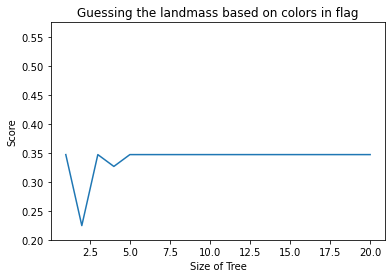

In [15]:
plt.plot(range(1, 21), scores)
plt.title('Guessing the landmass based on colors in flag')
plt.xlabel('Size of Tree')
plt.ylabel('Score')
plt.ylim((.20,.575))
plt.show()

13. Our graph doesn’t really look like we would expect it to. It seems like the depth of the tree isn’t really having an impact on its performance. This might be a good indication that we’re not using enough features.

    Let’s add all the features that have to do with shapes to our `data`. `data` should now be set equal to:

        flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses", "Saltires", "Quarters", "Sunstars", "Crescent","Triangle"]]

    What does your graph look like after making this change?


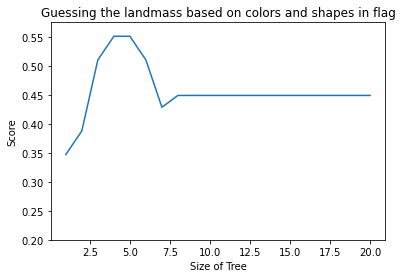

In [16]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses", "Saltires", "Quarters", "Sunstars", "Crescent","Triangle"]]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

plt.plot(range(1, 21), scores)
plt.title('Guessing the landmass based on colors and shapes in flag')
plt.xlabel('Size of Tree')
plt.ylabel('Score')
plt.ylim((.20,.575))
plt.show()

## Explore on Your Own

14. Nice work! That graph looks more like what we’d expect. If the tree is too short, we’re underfitting and not accurately representing the training data. If the tree is too big, we’re getting too specific and relying too heavily on the training data.

    There are a few different ways to extend this project:

-    Try to classify something else! Rather than predicting the `"Landmass"` feature, could predict something like the `"Language"`?
-    Find a subset of features that work better than what we’re currently using. An important note is that a feature that has categorical data won’t work very well as a feature. For example, we don’t want a decision node to split nodes based on whether the value for `"Language"` is above or below `5`.
-    Tune more parameters of the model. You can find a description of all the parameters you can tune in the Decision Tree Classifier (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) documentation. For example, see what happens if you tune `max_leaf_nodes`. Think about whether you would be overfitting or underfitting the data based on how many leaf nodes you allow.


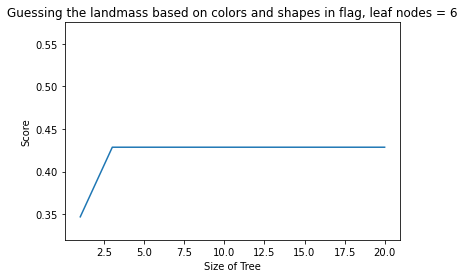

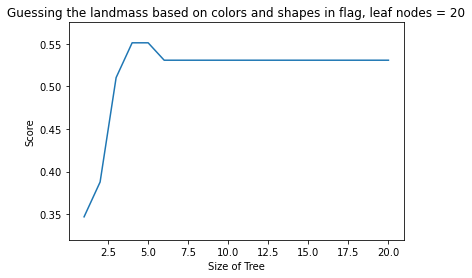

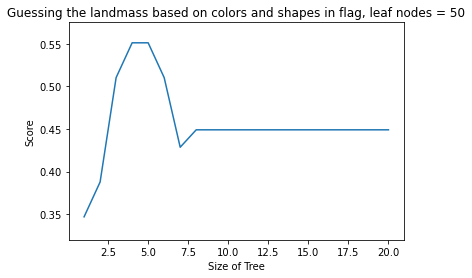

In [17]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses", "Saltires", "Quarters", "Sunstars", "Crescent","Triangle"]]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

def leafnodes(leaf_node):
    scores = []
    for i in range(1, 21):
        tree = DecisionTreeClassifier(random_state = 1, max_depth = i, max_leaf_nodes = leaf_node)
        tree.fit(train_data, train_labels)
        scores.append(tree.score(test_data, test_labels))

    plt.plot(range(1, 21), scores)
    plt.title('Guessing the landmass based on colors and shapes in flag, leaf nodes = {}'.format(leaf_node))
    plt.xlabel('Size of Tree')
    plt.ylabel('Score')
    plt.ylim((.32,.575))
    plt.show()

leafnodes(6)
leafnodes(20)
leafnodes(50)

*The default is an unlimited number of nodes. If you decrease the number of nodes, the data gets underfit.*